<a href="https://colab.research.google.com/github/tsanifaishal/MachineLearningTasks/blob/main/11thWeekTasks/Task_11_M_Tsani_Faishal_Azhar_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : M Tsani Faishal Azhar

NIM : 1103210143

Tugas : Lecture 11, Model LeNet, Dataset CFIR10

ChatGPT :https://chatgpt.com/share/0c530a6f-fbd3-4817-81bc-167bbc00fba6

#Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

#Modeling

In [ ]:
# Langkah 1: Impor dataset MNIST dari TensorFlow
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Langkah 2: Normalisasi data dan penyesuaian dimensi
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Langkah 3: One-hot encoding untuk label
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Langkah 4: Membangun model LeNet
model = models.Sequential()

# Layer 1: Convolutional + ReLU + Max pooling
model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Layer 2: Convolutional + ReLU + Max pooling
model.add(layers.Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten layer untuk mengubah output menjadi vektor satu dimensi
model.add(layers.Flatten())

# Layer 3: Fully connected layer with ReLU activation
model.add(layers.Dense(120, activation='relu'))

# Layer 4: Fully connected layer with ReLU activation
model.add(layers.Dense(84, activation='relu'))

# Output layer: Fully connected layer with softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Langkah 5: Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Langkah 6: Melatih model
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))


11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
469/469 [==============================] - 23s 47ms/step - loss: 0.3012 - accuracy: 0.9136 - val_loss: 0.0931 - val_accuracy: 0.9710
Epoch 2/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0783 - accuracy: 0.9767 - val_loss: 0.0585 - val_accuracy: 0.9812
Epoch 3/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0569 - accuracy: 0.9826 - val_loss: 0.0506 - val_accuracy: 0.9836
Epoch 4/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0445 - accuracy: 0.9863 - val_loss: 0.0501 - val_accuracy: 0.9843
Epoch 5/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0384 - accuracy: 0.9876 - val_loss: 0.0367 - val_accuracy: 0.9874
Epoch 6/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0315 - accuracy: 0.9901 - val_loss: 0.0382 - val_accuracy: 0.9877
Epoch 7/10
469/469 [==============================] - 22s 46ms/step - l

#Test Akurasi

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0351 - accuracy: 0.9887
Test accuracy: 0.9886999726295471


#Visualisasi

Epoch 1/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0401 - val_accuracy: 0.9872
Epoch 2/10
469/469 [==============================] - 22s 48ms/step - loss: 0.0153 - accuracy: 0.9948 - val_loss: 0.0337 - val_accuracy: 0.9893
Epoch 3/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.0342 - val_accuracy: 0.9905
Epoch 4/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0368 - val_accuracy: 0.9891
Epoch 5/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.0339 - val_accuracy: 0.9897
Epoch 6/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0356 - val_accuracy: 0.9903
Epoch 7/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0387 - val_accuracy:

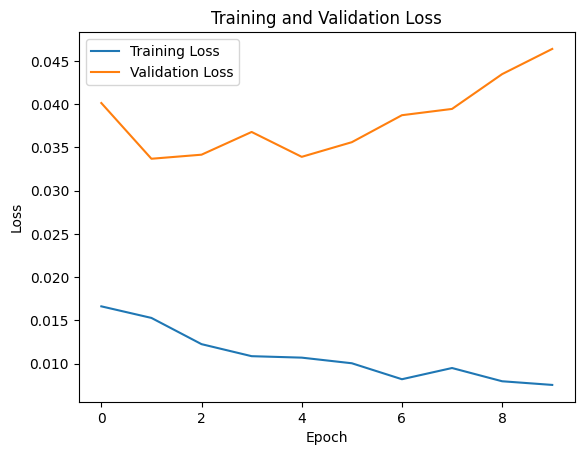

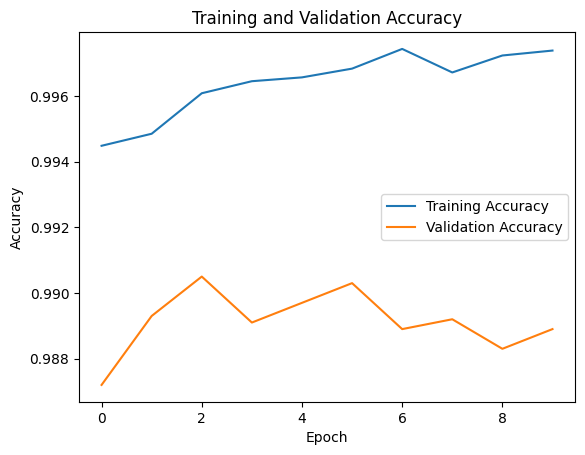

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
predictions = model.predict(test_images)


313/313 [==============================] - 4s 10ms/step
